In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers=pd.read_csv('customers.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')
reviews=pd.read_csv('reviews.csv')


print(customers.head())
print(orders.head())
print(products.head())
print(reviews.head())

  CustomerID            Name  Gender  Age                      Email  \
0      C0001    Sherry Price  Female   27  rogersjeffrey@example.net   
1      C0002    Tammy Martin  Female   28        megan27@example.com   
2      C0003  Kimberly Davis    Male   23       sandra94@example.org   
3      C0004     Mary Romero  Female   25        andre83@example.org   
4      C0005   Bradley Jones  Female   39         eadams@example.net   

               Country RegistrationDate  
0  Trinidad and Tobago       2022-09-15  
1         Saudi Arabia       2020-12-11  
2             Barbados       2020-08-02  
3               Tuvalu       2020-05-29  
4         Burkina Faso       2022-06-21  
  OrderID CustomerID ProductID  Quantity   OrderDate      Status  \
0   O0001      C0405     P0344         9  2024-04-27  Processing   
1   O0002      C0568     P0307         9  2024-05-02   Delivered   
2   O0003      C0876     P0340         5  2024-04-30    Returned   
3   O0004      C0861     P0106        10  2

In [3]:
print(customers.info())
print(orders.info())
print(products.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        1000 non-null   object
 1   Name              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Email             1000 non-null   object
 5   Country           1000 non-null   object
 6   RegistrationDate  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        1000 non-null   object 
 1   CustomerID     1000 non-null   object 
 2   ProductID      1000 non-null   object 
 3   Quantity       1000 non-null   int64  
 4   OrderDate      1000 non-null   object 
 5   Status 

In [4]:
print(customers.describe())
print(orders.describe())
print(products.describe())
print(reviews.describe())

               Age
count  1000.000000
mean     41.093000
std      13.749742
min      18.000000
25%      28.000000
50%      41.000000
75%      52.000000
max      65.000000
         Quantity  TotalAmount
count  1000.00000  1000.000000
mean      5.55400  2507.117410
std       2.88156  1474.682386
min       1.00000    11.400000
25%       3.00000  1189.465000
50%       6.00000  2494.715000
75%       8.00000  3839.037500
max      10.00000  4997.610000
             Price        Stock       Rating
count  1000.000000  1000.000000  1000.000000
mean    506.695550   252.692000     3.016700
std     286.580977   143.328253     1.186347
min      12.320000     1.000000     1.000000
25%     263.535000   130.750000     2.000000
50%     501.125000   254.000000     3.000000
75%     757.510000   377.000000     4.100000
max     999.950000   500.000000     5.000000
            Rating
count  1000.000000
mean      3.035000
std       1.419785
min       1.000000
25%       2.000000
50%       3.000000
75%       4.

In [5]:
print("The null in customer")
print(customers.isnull().sum())
print("The null in order")
print(orders.isnull().sum())
print("The null in review")
print(reviews.isnull().sum())
print("The null in product")
print(products.isnull().sum())

The null in customer
CustomerID          0
Name                0
Gender              0
Age                 0
Email               0
Country             0
RegistrationDate    0
dtype: int64
The null in order
OrderID          0
CustomerID       0
ProductID        0
Quantity         0
OrderDate        0
Status           0
PaymentMethod    0
TotalAmount      0
dtype: int64
The null in review
ReviewID      0
ProductID     0
CustomerID    0
Rating        0
ReviewDate    0
ReviewText    0
dtype: int64
The null in product
ProductID      0
ProductName    1
Category       0
Price          0
Stock          0
Rating         0
dtype: int64


In [6]:
products.isnull().sum()
products['ProductName'].fillna(method='ffill', inplace=True)

In [7]:
print("The Duplicate records in customer")
print(customers.duplicated().sum())
print("The Duplicate records in order")
print(orders.duplicated().sum())
print("The Duplicate records in review")
print(reviews.duplicated().sum())
print("The Duplicate records in product")
print(products.duplicated().sum())

The Duplicate records in customer
0
The Duplicate records in order
0
The Duplicate records in review
0
The Duplicate records in product
0


ProductID
P0992    14659.04
P0037    14256.47
P0435    13125.55
P0459    12568.85
P0179    12384.81
           ...   
P0241       72.63
P0394       36.47
P0628       26.99
P0614       19.41
P0033       13.99
Name: TotalAmount, Length: 639, dtype: float64


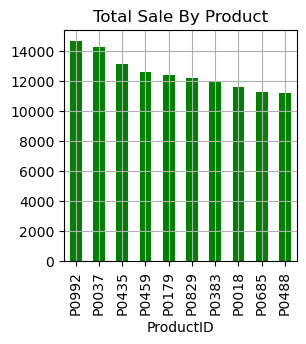

In [34]:
Totalsale_product=orders.groupby('ProductID') ['TotalAmount'].sum().sort_values(ascending=False)
print(Totalsale_product)

Totalsale_product.head(10).plot(kind='bar',color='green',figsize=(3,3))
plt.title('Total Sale By Product')
plt.grid()
plt.show()

In [9]:
merged_saleproduct = pd.merge(Totalsale_product,products, on='ProductID',how='left')
merged_saleproduct.head(10)

,ProductID,TotalAmount,ProductName,Category,Price,Stock,Rating
0,P0992,14659.04,Appear,Electronics,532.49,176,3.3
1,P0037,14256.47,Reason,Sportswear,898.55,479,1.1
2,P0435,13125.55,Admit,Toys,715.67,95,2.0
3,P0459,12568.85,Congress,Sportswear,196.74,76,2.4
4,P0179,12384.81,Again,Home Appliances,791.38,57,3.4
5,P0829,12143.09,Score,Sportswear,366.66,193,4.2
6,P0383,11987.15,We,Books,422.91,441,1.3
7,P0018,11604.51,Study,Sportswear,855.58,400,1.5
8,P0685,11273.66,Worker,Sportswear,590.92,84,3.8
9,P0488,11200.91,School,Home Appliances,89.58,170,2.0


Category
Toys               568815.73
Sportswear         554621.00
Home Appliances    486606.37
Electronics        467626.71
Books              429447.60
Name: TotalAmount, dtype: float64


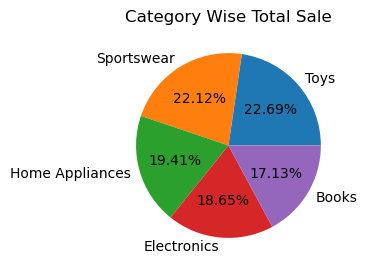

In [36]:
Category_totalsale=merged_saleproduct.groupby('Category') ['TotalAmount'].sum().sort_values(ascending=False)
print(Category_totalsale)
Category_totalsale.plot(kind='pie',title='Category Wise Total Sale', autopct='%1.2f%%', figsize=(3,3))
plt.ylabel("")
plt.show()

In [11]:
Merge_customerorder=pd.merge(customers,orders,on='CustomerID', how='inner')
print(Merge_customerorder)

    CustomerID            Name  Gender  Age                      Email  \
0        C0001    Sherry Price  Female   27  rogersjeffrey@example.net   
1        C0001    Sherry Price  Female   27  rogersjeffrey@example.net   
2        C0004     Mary Romero  Female   25        andre83@example.org   
3        C0005   Bradley Jones  Female   39         eadams@example.net   
4        C0005   Bradley Jones  Female   39         eadams@example.net   
..         ...             ...     ...  ...                        ...   
995      C0996    Ashley Frank    Male   18      richard70@example.net   
996      C0996    Ashley Frank    Male   18      richard70@example.net   
997      C0997  Megan Harrison    Male   56        misty31@example.org   
998      C0999   Robert Hudson  Female   64        lnorton@example.org   
999      C0999   Robert Hudson  Female   64        lnorton@example.org   

                 Country RegistrationDate OrderID ProductID  Quantity  \
0    Trinidad and Tobago       2022-09

In [12]:
order_product=pd.merge(orders,products,on='ProductID',how='left')
order_product.head()

,OrderID,CustomerID,ProductID,Quantity,OrderDate,Status,PaymentMethod,TotalAmount,ProductName,Category,Price,Stock,Rating
0,O0001,C0405,P0344,9,2024-04-27,Processing,Net Banking,3803.17,Man,Toys,344.16,93,2.0
1,O0002,C0568,P0307,9,2024-05-02,Delivered,Credit Card,1351.08,Two,Sportswear,754.09,285,2.2
2,O0003,C0876,P0340,5,2024-04-30,Returned,Credit Card,883.22,Responsibility,Electronics,759.89,388,3.8
3,O0004,C0861,P0106,10,2024-04-24,Cancelled,Net Banking,2759.06,Last,Home Appliances,748.99,107,1.6
4,O0005,C0542,P0270,2,2024-04-17,Processing,Debit Card,4046.95,Former,Sportswear,252.79,254,1.1


In [13]:
merged=pd.merge(order_product,customers,on='CustomerID',how='left')
merged.head()

,OrderID,CustomerID,ProductID,Quantity,OrderDate,Status,PaymentMethod,TotalAmount,ProductName,Category,Price,Stock,Rating,Name,Gender,Age,Email,Country,RegistrationDate
0,O0001,C0405,P0344,9,2024-04-27,Processing,Net Banking,3803.17,Man,Toys,344.16,93,2.0,Jenny Clarke,Male,59,edwardswalter@example.net,Vietnam,2024-09-13
1,O0002,C0568,P0307,9,2024-05-02,Delivered,Credit Card,1351.08,Two,Sportswear,754.09,285,2.2,Amy Leonard,Female,34,nicolemccarthy@example.org,New Caledonia,2021-09-02
2,O0003,C0876,P0340,5,2024-04-30,Returned,Credit Card,883.22,Responsibility,Electronics,759.89,388,3.8,Molly Webster,Male,41,mike74@example.org,Mozambique,2024-07-22
3,O0004,C0861,P0106,10,2024-04-24,Cancelled,Net Banking,2759.06,Last,Home Appliances,748.99,107,1.6,William Munoz,Female,52,sarah50@example.net,Paraguay,2020-01-22
4,O0005,C0542,P0270,2,2024-04-17,Processing,Debit Card,4046.95,Former,Sportswear,252.79,254,1.1,Beth Massey,Female,18,jamescarroll@example.org,Afghanistan,2022-03-08


In [14]:
pivot=Merge_customerorder.pivot_table(index='Country', values='TotalAmount',columns='PaymentMethod', aggfunc='sum')
pivot.head(10)

PaymentMethod,Credit Card,Debit Card,Net Banking,PayPal
Country,,,,
Afghanistan,NaN,7041.13,4361.33,NaN
Albania,NaN,NaN,5811.62,3838.06
Algeria,3263.57,1453.53,NaN,NaN
American Samoa,NaN,6886.06,651.31,5416.61
Angola,NaN,6401.91,2199.82,NaN
Anguilla,NaN,4303.88,NaN,NaN
Antarctica (the territory South of 60 deg S),NaN,7174.34,NaN,851.38
Antigua and Barbuda,4627.43,1255.38,NaN,NaN
Argentina,1412.33,NaN,8254.31,NaN


In [18]:
pivot2=merged.pivot_table(index=['Country','ProductName'],values='TotalAmount',columns= 'Category',aggfunc='sum')
pivot2.head(20)

Category                                                    Books  \
Country                                      ProductName            
Afghanistan                                  Accept           NaN   
                                             Former           NaN   
                                             Seem         4361.33   
Albania                                      Another      2378.05   
                                             Drop             NaN   
                                             Guess            NaN   
                                             Two              NaN   
Algeria                                      Could            NaN   
                                             Whole            NaN   
American Samoa                               Data             NaN   
                                             Hair          651.31   
                                             It               NaN   
                                             Maintain         NaN   
                                             Will             NaN   
                                             Yard             NaN   
Angola                                       Able             NaN   
                                             Line             NaN   
                                             Scene            NaN   
Anguilla                                     Either       4303.88   
Antarctica (the territory South of 60 deg S) Again            NaN   

Category                                                  Electronics  \
Country                                      ProductName                
Afghanistan                                  Accept               NaN   
                                             Former               NaN   
                                             Seem                 NaN   
Albania                                      Another              NaN   
                                             Drop                 NaN   
                                             Guess                NaN   
                                             Two                  NaN   
Algeria                                      Could                NaN   
                                             Whole            1453.53   
American Samoa                               Data             3661.57   
                                             Hair                 NaN   
                                             It                   NaN   
                                             Maintain             NaN   
                                             Will              592.91   
                                             Yard             1388.69   
Angola                                       Able                 NaN   
                                             Line             2199.82   
                                             Scene                NaN   
Anguilla                                     Either               NaN   
Antarctica (the territory South of 60 deg S) Again                NaN   

Category                                                  Home Appliances  \
Country                                      ProductName                    
Afghanistan                                  Accept                   NaN   
                                             Former                   NaN   
                                             Seem                     NaN   
Albania                                      Another                  NaN   
                                             Drop                     NaN   
                                             Guess                    NaN   
                                             Two                      NaN   
Algeria                                      Could                    NaN   
                                             Whole                    NaN   
American Samoa             

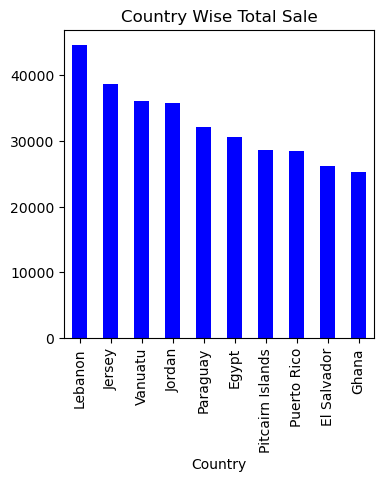

In [32]:
Country_Totalsale=Merge_customerorder.groupby('Country') ['TotalAmount'].sum().sort_values(ascending=False)
Country_Totalsale.head(10)
Country_Totalsale.head(10).plot(kind='bar',color='blue',figsize=(4,4))
plt.title('Country Wise Total Sale')
plt.show()

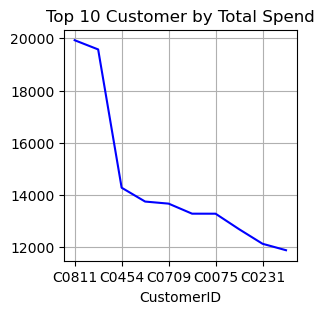

In [29]:
Customer_Spend=Merge_customerorder.groupby('CustomerID') ['TotalAmount'].sum().sort_values(ascending=False)
Customer_Spend.head(10)
Customer_Spend.head(10).plot(kind='line',color='blue', figsize=(3,3))
plt.title('Top 10 Customer by Total Spend')
plt.grid()
plt.show()

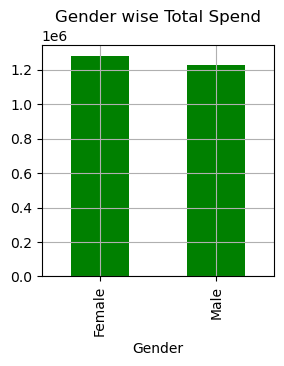

In [25]:
Gender_Spend=Merge_customerorder.groupby('Gender') ['TotalAmount'].sum().sort_values(ascending=False)
Gender_Spend.head()
Gender_Spend.plot(kind='bar',color='green',figsize=(3,3))
plt.title('Gender wise Total Spend')
plt.grid()
plt.show()

In [29]:
Avg_Ratting=reviews.groupby('ProductID') ['Rating'].mean()
print(Avg_Ratting)

ProductID
P0002    4.0
P0003    2.0
P0004    1.0
P0005    4.0
P0006    1.5
        ... 
P0993    2.5
P0994    2.0
P0996    4.0
P0999    3.5
P1000    3.0
Name: Rating, Length: 643, dtype: float64


In [32]:
product_performance=orders.merge(Avg_Ratting, on='ProductID',how='left')
product_performance.head()

,OrderID,CustomerID,ProductID,Quantity,OrderDate,Status,PaymentMethod,TotalAmount,Rating
0,O0001,C0405,P0344,9,2024-04-27,Processing,Net Banking,3803.17,2.666667
1,O0002,C0568,P0307,9,2024-05-02,Delivered,Credit Card,1351.08,3.333333
2,O0003,C0876,P0340,5,2024-04-30,Returned,Credit Card,883.22,3.000000
3,O0004,C0861,P0106,10,2024-04-24,Cancelled,Net Banking,2759.06,4.000000
4,O0005,C0542,P0270,2,2024-04-17,Processing,Debit Card,4046.95,2.500000


Status
Cancelled     258
Processing    254
Delivered     252
Returned      236
Name: count, dtype: int64


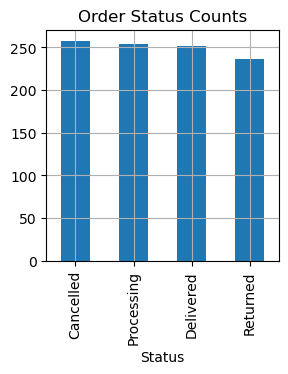

In [27]:
order_count=orders["Status"].value_counts()
print(order_count)

order_count.plot(kind='bar' , figsize = (3,3))
plt.title('Order Status Counts')
plt.grid()
plt.show()

PaymentMethod
PayPal         261
Debit Card     260
Net Banking    253
Credit Card    226
Name: count, dtype: int64


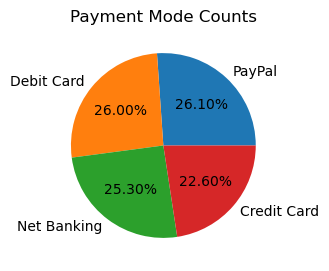

In [35]:
Payment_count=orders['PaymentMethod'].value_counts()
print(Payment_count)

Payment_count.plot(kind='pie',autopct='%1.2f%%', figsize=(3,3))
plt.title('Payment Mode Counts')
plt.ylabel('')
plt.show()